In [2]:
print("hello, world!")

hello, world!


Simulating Historical Communication Networks in Python
------------------------------------------------------

In [9]:
%pip install --force-reinstall -v "mesa>=2.4.0,<3.0"

Using pip 25.0.1 from /usr/local/python/3.12.1/lib/python3.12/site-packages/pip (python 3.12)
  Obtaining dependency information for mesa<3.0,>=2.4.0 from https://files.pythonhosted.org/packages/19/91/d04f7b5562e6817ef2bf4327104ea934751982acf33521ff947bd63cdffe/mesa-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/7e/d4/7ebdbd03970677812aac39c869717059dbb71a4cfc033ca6e5221787892c/click-8.1.8-py3-none-any.whl.metadata
  Obtaining dependency information for cookiecutter from https://files.pythonhosted.org/packages/b6/d9/0137658a353168ffa9d0fc14b812d3834772040858ddd1cb6eeaf09f7a44/cookiecutter-2.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/63/23/c0615001f67ce7c96b3051d856baedc0c818a2ed84570b9bf9bde200f85d/matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for mesa-viz-t

In [3]:
import mesa

2.5.1 Setting up the model

In [6]:
class LetterAgent(mesa.Agent):
    """An agent with unique_id but no initial letters."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.letters_sent = 0
        self.letters_received = 0

class LetterModel(mesa.Model):
    """A model with N agents."""

    def __init__(self, N):
        super().__init__()
        self.num_agents = N
        # Create N agents
        for i in range(self.num_agents):
            a = LetterAgent(i, self)

2.5.2 Adding Time

In [7]:
class LetterAgent(mesa.Agent):
    """An agent with unique_id but no initial letters."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.letters_sent = 0
        self.letters_received = 0

    def step(self):
        # The agent's step will go here. 
        # For demonstration purposes we will print the agent's unique_id
        print("Hi, I am agent " + str(self.unique_id) + ".")

class LetterModel(mesa.Model):
    """A model with N agents."""

    def __init__(self, N):
        super().__init__()
        self.num_agents = N
        self.schedule = mesa.time.RandomActivation(self)
        # Create N agents
        for i in range(self.num_agents):
            a = LetterAgent(i, self)
            self.schedule.add(a)

    def step(self):
        """Advance the model by one step."""
        self.schedule.step()

In [8]:
empty_model = LetterModel(10) # create a model with 10 agents
empty_model.step() # execute the step function once

Hi, I am agent 3.
Hi, I am agent 9.
Hi, I am agent 4.
Hi, I am agent 7.
Hi, I am agent 1.
Hi, I am agent 5.
Hi, I am agent 2.
Hi, I am agent 6.
Hi, I am agent 8.
Hi, I am agent 0.


2.5.3 Agent Step

In [9]:
class LetterAgent(mesa.Agent):
    """An agent with no initial letters."""

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.letters_sent = 0
        self.letters_received = 0

    def step(self):
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.letters_received += 1
        self.letters_sent += 1

2.5.4 Running your First Model

In [10]:
model = LetterModel(10)
for i in range(20):
    model.step()

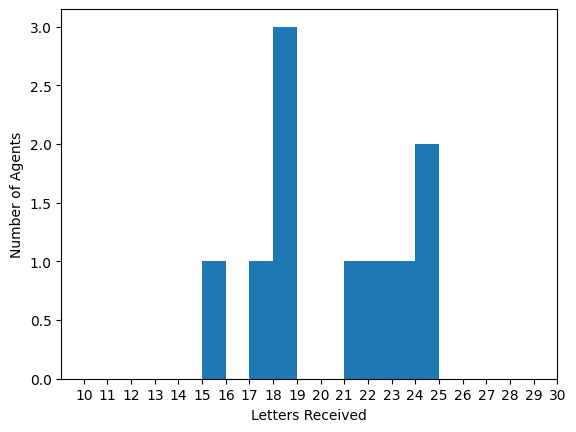

In [12]:
import matplotlib.pyplot as plt

agent_letters_recd = [b.letters_received for b in model.schedule.agents]
plt.hist(agent_letters_recd, bins=range(10,30))
plt.xticks(range(10,31))
plt.xlabel("Letters Received")
plt.ylabel("Number of Agents")

plt.show()

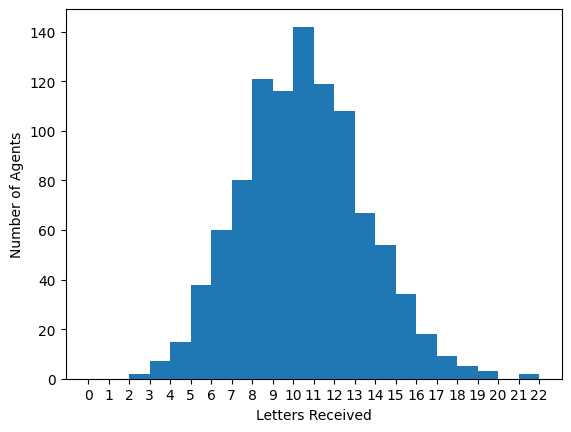

In [13]:
all_letters_rec = []

# This runs the model with 10 agents 100 times, each model executing 10 steps. 
for j in range(100):
    # Run the model
    model = LetterModel(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_letters_rec.append(agent.letters_received)

plt.hist(all_letters_rec, bins=range(max(all_letters_rec) + 1))
plt.xticks(range(max(all_letters_rec)+1))
plt.xlabel("Letters Received")
plt.ylabel("Number of Agents")

plt.show()